# Telecom Churn - Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [215]:
# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -mpip install statsmodels
# !{sys.executable} -mpip install imbalanced-learn

In [216]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [217]:
import warnings
warnings.filterwarnings('ignore')

# show multiple outputs in jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import datetime

### Data Preparation

In [218]:
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")
telecom_churn_data.head(20)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [219]:
telecom_churn_data.shape

(99999, 226)

In [220]:
telecom_churn_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [221]:
telecom_churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In total, 99999 rows and 226 columns in the data. We need to check if there are any categorical columns

In [222]:
telecom_churn_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [223]:
# We will create a copy of original data.
original_df = telecom_churn_data.copy()

#### Filter High Value Customers

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 
As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: **Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**


In [224]:
# total data recharge amount for June and July
telecom_churn_data['total_rech_data_amt_6'] = telecom_churn_data.av_rech_amt_data_6 * telecom_churn_data.total_rech_data_6
telecom_churn_data['total_rech_data_amt_7'] = telecom_churn_data.av_rech_amt_data_7 * telecom_churn_data.total_rech_data_7

In [225]:
# total recharge amount for June and July
telecom_churn_data['amt_data_6'] = telecom_churn_data.total_rech_amt_6.fillna(0) + telecom_churn_data.total_rech_data_amt_6.fillna(0)
telecom_churn_data['amt_data_7'] = telecom_churn_data.total_rech_amt_7.fillna(0) + telecom_churn_data.total_rech_data_amt_7.fillna(0)

In [226]:
# average recharge done in June and July
telecom_churn_data['av_amt_data_6_7'] = (telecom_churn_data.amt_data_6 + telecom_churn_data.amt_data_7)/2

In [227]:
# 70th percentile of the calculated average amount
percentile_70_6n7 = telecom_churn_data.av_amt_data_6_7.quantile(0.7)
print("70 percentile is : ", percentile_70_6n7)

70 percentile is :  478.0


In [228]:
# filter the given data set based on 70th percentile
churn_hv = telecom_churn_data.loc[telecom_churn_data.av_amt_data_6_7 >= telecom_churn_data.av_amt_data_6_7.quantile(0.7), :]
churn_hv = churn_hv.reset_index(drop=True)
churn_hv.shape

(30001, 231)

#### Churn Metric

In [229]:
# total incoming and outgoing minutes of usage
churn_hv['total_calls_mou_9'] = churn_hv.total_ic_mou_9 + churn_hv.total_og_mou_9

In [230]:
# total 2g and 3g data consumption
churn_hv['total_internet_mb_9'] =  churn_hv.vol_2g_mb_9 + churn_hv.vol_3g_mb_9

In [231]:
# 0 - not churn, 1 - churn
churn_hv['churn'] = churn_hv.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [232]:
churn_hv.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,amt_data_6,amt_data_7,av_amt_data_6_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,

In [233]:
# churn vs non churn percentage
churn_hv['churn'].value_counts()/len(churn_hv)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

92% of the customers do not churn. This also points us to **class imbalance**.

### Deriving some more metrics

If the usage drops in the recent month, as compared to previous month then there might be high chances of churn.

In [234]:
# Current month - Average of previous months

churn_hv['total_rech_num_diff'] = churn_hv.total_rech_num_8 - ((churn_hv.total_rech_num_6 + churn_hv.total_rech_num_7)/2)

churn_hv['total_rech_amt_diff'] = churn_hv.total_rech_amt_8 - ((churn_hv.total_rech_amt_6 + churn_hv.total_rech_amt_7)/2)

churn_hv['vol_2g_mb_diff'] = churn_hv.vol_2g_mb_8 - ((churn_hv.vol_2g_mb_6 + churn_hv.vol_2g_mb_7)/2)

churn_hv['vol_3g_mb_diff'] = churn_hv.vol_3g_mb_8 - ((churn_hv.vol_3g_mb_6 + churn_hv.vol_3g_mb_7)/2)

churn_hv['arpu_diff'] = churn_hv.arpu_8 - ((churn_hv.arpu_6 + churn_hv.arpu_7)/2)

churn_hv['onnet_mou_diff'] = churn_hv.onnet_mou_8 - ((churn_hv.onnet_mou_6 + churn_hv.onnet_mou_7)/2)

churn_hv['offnet_mou_diff'] = churn_hv.offnet_mou_8 - ((churn_hv.offnet_mou_6 + churn_hv.offnet_mou_7)/2)

churn_hv['roam_og_mou_diff'] = churn_hv.roam_og_mou_8 - ((churn_hv.roam_og_mou_6 + churn_hv.roam_og_mou_7)/2)

churn_hv['loc_og_mou_diff'] = churn_hv.loc_og_mou_8 - ((churn_hv.loc_og_mou_6 + churn_hv.loc_og_mou_7)/2)

churn_hv['std_og_mou_diff'] = churn_hv.std_og_mou_8 - ((churn_hv.std_og_mou_6 + churn_hv.std_og_mou_7)/2)

churn_hv['isd_og_mou_diff'] = churn_hv.isd_og_mou_8 - ((churn_hv.isd_og_mou_6 + churn_hv.isd_og_mou_7)/2)

churn_hv['spl_og_mou_diff'] = churn_hv.spl_og_mou_8 - ((churn_hv.spl_og_mou_6 + churn_hv.spl_og_mou_7)/2)

churn_hv['total_og_mou_diff'] = churn_hv.total_og_mou_8 - ((churn_hv.total_og_mou_6 + churn_hv.total_og_mou_7)/2)

churn_hv['roam_ic_mou_diff'] = churn_hv.roam_ic_mou_8 - ((churn_hv.roam_ic_mou_6 + churn_hv.roam_ic_mou_7)/2)

churn_hv['loc_ic_mou_diff'] = churn_hv.loc_ic_mou_8 - ((churn_hv.loc_ic_mou_6 + churn_hv.loc_ic_mou_7)/2)

churn_hv['std_ic_mou_diff'] = churn_hv.std_ic_mou_8 - ((churn_hv.std_ic_mou_6 + churn_hv.std_ic_mou_7)/2)

churn_hv['isd_ic_mou_diff'] = churn_hv.isd_ic_mou_8 - ((churn_hv.isd_ic_mou_6 + churn_hv.isd_ic_mou_7)/2)

churn_hv['spl_ic_mou_diff'] = churn_hv.spl_ic_mou_8 - ((churn_hv.spl_ic_mou_6 + churn_hv.spl_ic_mou_7)/2)

churn_hv['total_ic_mou_diff'] = churn_hv.total_ic_mou_8 - ((churn_hv.total_ic_mou_6 + churn_hv.total_ic_mou_7)/2)

churn_hv['max_rech_amt_diff'] = churn_hv.max_rech_amt_8 - ((churn_hv.max_rech_amt_6 + churn_hv.max_rech_amt_7)/2)

churn_hv['total_rech_data_diff'] = churn_hv.total_rech_data_8 - ((churn_hv.total_rech_data_6 + churn_hv.total_rech_data_7)/2)

churn_hv['max_rech_data_diff'] = churn_hv.max_rech_data_8 - ((churn_hv.max_rech_data_6 + churn_hv.max_rech_data_7)/2)

churn_hv['av_rech_amt_data_diff'] = churn_hv.av_rech_amt_data_8 - ((churn_hv.av_rech_amt_data_6 + churn_hv.av_rech_amt_data_7)/2)

In [235]:
# drop columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8)
churn_hv.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

churn_hv.shape

(30001, 249)

In [236]:
# Drop columns with no variance
for i in churn_hv.columns:
    if churn_hv[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", churn_hv[i].nunique(),"unique value")
        print("Dropping the column",i)
        churn_hv.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",churn_hv.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column last_date_of_month_9 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_9

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_m

## Missing Data Treatment

In [237]:
# segregating columns according to their types with reference to data dictionary

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

categorical_cols =  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

numeric_cols = []

for cols in churn_hv.columns:
    if cols not in id_cols + date_cols + categorical_cols:
        numeric_cols.append(cols)
        
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [238]:
# lets check the null values present in the dataset
(churn_hv.isnull().sum() * 100 / len(churn_hv)).sort_values(ascending = False)

av_rech_amt_data_diff       59.904670
total_rech_data_diff        59.904670
max_rech_data_diff          59.904670
night_pck_user_9            49.268358
fb_user_9                   49.268358
max_rech_data_9             49.268358
count_rech_3g_9             49.268358
arpu_3g_9                   49.268358
count_rech_2g_9             49.268358
date_of_last_rech_data_9    49.268358
arpu_2g_9                   49.268358
date_of_last_rech_data_8    46.825106
arpu_2g_8                   46.825106
fb_user_8                   46.825106
max_rech_data_8             46.825106
arpu_3g_8                   46.825106
count_rech_2g_8             46.825106
night_pck_user_8            46.825106
count_rech_3g_8             46.825106
count_rech_3g_6             44.148528
count_rech_2g_6             44.148528
max_rech_data_6             44.148528
fb_user_6                   44.148528
arpu_3g_6                   44.148528
total_rech_data_amt_6       44.148528
arpu_2g_6                   44.148528
date_of_last

Let's remove all the column's from the last month September.

In [239]:
cols = [c for c in churn_hv.columns if c[-2:] == '_9']
churn_hv.drop(axis=1, columns =cols, inplace=True)
cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_calls_mou_9',
 'total_internet_mb_9']

In [240]:
# Drop Columns with > 25% of missing values except 9th Month's columns
cols = churn_hv.columns
telecom_null_perc = churn_hv.isnull().sum() * 100 / len(churn_hv)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 25.0)]["col_name"]

# lets drop these columns
churn_hv.drop(drop_cols, axis=1,inplace = True)
churn_hv.shape

(30001, 153)

In [241]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = churn_hv.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6    6/21/2014
date_of_last_rech_7    7/16/2014
date_of_last_rech_8     8/8/2014
Name: 0, dtype: object


In [242]:
# convert to datetime
for col in object_col_data.columns:
    churn_hv[col] = pd.to_datetime(churn_hv[col])

In [243]:
# drop all the rows where date_of_last_rech_6 is null
churn_hv['date_of_last_rech_6'].isnull().sum()
churn_hv['date_of_last_rech_6'].dropna(inplace=True)

73

Instead of keeping three different column values for last recharged date, let's convert them to number of days passed since last time the customer did any recharg.

In [244]:
churn_hv["days_since_last_rech"] = churn_hv[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]].max(axis=1)
churn_hv['days_since_last_rech'] = datetime(2014, 9, 1) - churn_hv['days_since_last_rech']
churn_hv['days_since_last_rech'] = churn_hv['days_since_last_rech'].apply(lambda x: x.days)
churn_hv.loc[:,'date_of_last_rech_8':'days_since_last_rech']

,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_data_6,amt_data_7,av_amt_data_6_7,churn,total_rech_num_diff,total_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,roam_ic_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,max_rech_amt_diff,days_since_last_rech
0,2014-08-08,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,-1.5,-55.0,-9.975,-7.555,7.7025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,5.440,0.0,24
1,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,2.0,2453.0,0.000,0.000,1961.9650,-3.970,-184.385,19.895,-222.245,9.840,9.920,4.250,-198.225,6.78,-203.515,17.130,23.295,-0.105,-163.510,395.0,6
2,2014-08-30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,437.0,955.0,696.0,0,-6.0,-399.0,-177.970,-363.535,-298.1100,-347.280,48.835,0.000,-270.095,-38.590,0.000,10.230,-298.450,0.00,-36.840,-12.795,0.000,0.000,-49.635,-92.0,2
3,2014-08-31,30,20,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0,0,3.0,78.0,0.000,0.000,81.6570,-32.120,156.085,0.000,34.175,89.800,0.000,0.000,123.975,0.00,52.605,38.945,0.000,0.000,91.550,0.0,1
4,2014-08-24,0,179,0,0.00,0.48,0.01,0.00,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.00,0.0,1166.0,583.0,0,0.0,212.0,-0.230,710.375,232.8425,-16.230,118.505,0.000,49.345,35.255,-0.005,17.660,102.270,0.00,78.690,48.375,-10.375,0.000,127.095,89.5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,2014-08-27,252,0,130,54.81,101.02,112.07,692.72,596.91,1012.70,0,0,0,0,0,0,1,1,1,0,0,0,473,1100.43,619.59,668.05,0.33,504.0,624.0,564.0,0,0.0,200.0,34.155,367.885,73.6135,49.380,19.330,0.000,63.250,10.935,0.000,-5.475,68.715,0.00,44.445,-35.950,-0.030,-0.065,8.830,0.0,5
29997,2014-08-27,0,25,25,1248.50,725.05,202.22,0.00,0.00,0.00,1,0,0,0,4,5,0,0,0,0,0,0,820,0.00,0.00,0.00,0.00,514.0,723.0,618.5,0,0.0,-162.5,-784.555,0.000,-147.0730,-297.200,-21.400,0.000,-305.435,-1.995,0.000,-11.165,-319.130,0.00,-1.000,-2.560,0.000,-0.215,-3.785,-70.0,5
29998,2014-08-18,550,786,0,34.28,16.41,6.47,736.01,1129.34,926.78,0,0,0,1,1,1,0,0,0,0,0,0,2696,497.45,598.67,604.08,0.00,584.0,1144.0,864.0,0,-4.0,-823.5,-18.875,-5.895,14.2335,97.365,-105.505,0.000,43.605,-48.410,0.000,-7.185,-11.990,0.00,43.670,15.050,-0.215,0.000,58.505,-643.0,14
29999,2014-08-29,50,50,50,0.00,0.00,0.79,0.00,13.56,678.74,0,1,1,0,0,0,0,0,0,0,0,0,328,104.73,0.00,0.00,0.00,380.0,708.0,544.0,0,-3.0,37.0,0.790,671.960,-10.6650,-184.715,21.885,0.000,-171.205,8.355,0.000,0.010,-162.840,0.00,846.605,-299.965,0.000,0.000,546.860,52.0,3


In [245]:
cols = [c for c in churn_hv.columns if "date_of_last_rech" in c]
churn_hv.drop(axis=1, columns =cols, inplace=True)
cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

Let's get rid of the rest of the null value records, since there are very few of them left

In [252]:
churn_hv.isnull().sum().sort_values(ascending = False)

days_since_last_rech    0
loc_ic_t2t_mou_6        0
total_og_mou_7          0
total_og_mou_6          0
og_others_8             0
og_others_7             0
og_others_6             0
spl_og_mou_8            0
spl_og_mou_7            0
spl_og_mou_6            0
isd_og_mou_8            0
isd_og_mou_7            0
isd_og_mou_6            0
std_og_mou_8            0
std_og_mou_7            0
std_og_mou_6            0
std_og_t2f_mou_8        0
total_og_mou_8          0
loc_ic_t2t_mou_7        0
std_og_t2f_mou_6        0
loc_ic_t2t_mou_8        0
std_ic_t2m_mou_8        0
std_ic_t2m_mou_7        0
std_ic_t2m_mou_6        0
std_ic_t2t_mou_8        0
std_ic_t2t_mou_7        0
std_ic_t2t_mou_6        0
loc_ic_mou_8            0
loc_ic_mou_7            0
loc_ic_mou_6            0
loc_ic_t2f_mou_8        0
loc_ic_t2f_mou_7        0
loc_ic_t2f_mou_6        0
loc_ic_t2m_mou_8        0
loc_ic_t2m_mou_7        0
loc_ic_t2m_mou_6        0
std_og_t2f_mou_7        0
std_og_t2m_mou_8        0
std_ic_t2f_m

In [247]:
churn_hv = churn_hv[~np.isnan(churn_hv['loc_ic_t2f_mou_8'])]
churn_hv = churn_hv[~np.isnan(churn_hv['loc_ic_mou_6'])]
churn_hv = churn_hv[~np.isnan(churn_hv['loc_ic_t2m_mou_7'])]

### EDA

#### Univariate 

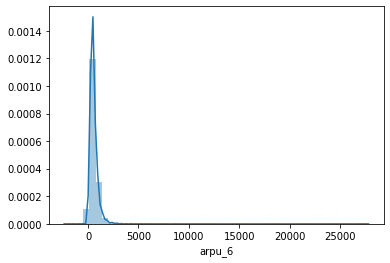

In [248]:
sns.distplot(churn_hv.arpu_6)

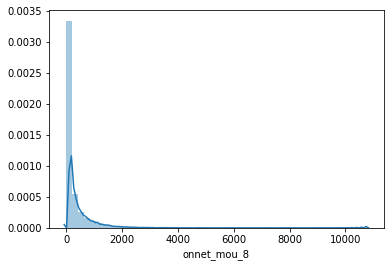

In [249]:
sns.distplot(churn_hv.onnet_mou_8)

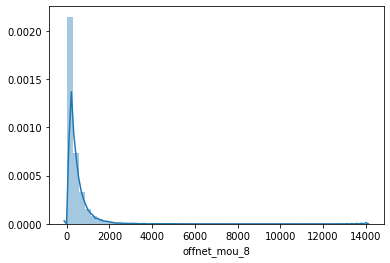

In [250]:
sns.distplot(churn_hv.offnet_mou_8)

#### Bivariate

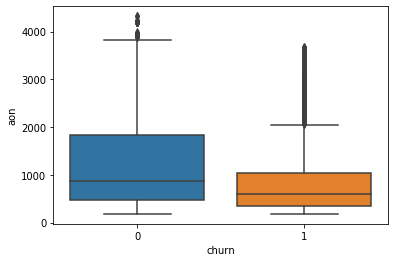

In [113]:
sns.boxplot(churn_hv.churn, churn_hv.aon)

Variables are extremely skewed towards left.

In [114]:
corr = churn_hv.corr()
corr

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_data_6,amt_data_7,av_amt_data_6_7,churn,total_rech_num_diff,total_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,roam_ic_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,max_rech_amt_diff,days_since_last_rech
mobile_number,1.000000,0.033944,0.029496,0.034570,0.008389,0.003247,0.004858,0.019866,0.009881,0.015685,0.009943,-0.003249,0.003916,0.004869,-0.002574,-0.004482,0.046846,0.044038,0.043188,0.078262,0.074566,0.078340,0.051137,0.051869,0.055426,-0.013157,-0.015662,-0.008163,0.083164,0.079330,0.080564,-0.018018,-0.022027,-0.018316,-0.026919,-0.030848,-0.027908,0.025773,0.017750,0.021549,-0.029577,-0.035093,-0.030386,-0.003536,-0.003212,-0.004171,-0.019979,-0.022713,-0.015567,-0.007227,-0.000996,0.000492,0.021971,0.013738,0.019837,0.032010,0.028589,0.031659,0.062030,0.055988,0.058330,0.054198,0.055603,0.053078,0.067834,0.062580,0.064668,-0.001782,0.002963,-0.001825,-0.011721,-0.012914,-0.015221,0.014525,0.011390,0.013176,-0.007361,-0.006048,-0.010384,0.059045,0.054462,0.055447,-0.024633,-0.003117,-0.032000,0.002749,0.001020,0.000211,0.013244,0.008898,0.008753,-0.028577,-0.042969,-0.036143,0.033132,0.032579,0.032562,0.058218,0.058546,0.063373,0.045361,0.051821,0.044710,-0.015438,-0.018346,-0.018737,-0.019905,-0.010386,-0.006439,0.008912,0.009545,0.007620,-0.042201,-0.041207,-0.032469,0.003566,0.005660,0.014425,-0.014893,-0.013193,-0.009693,0.315694,-0.032058,-0.028015,-0.037881,-0.007521,-0.004704,-0.005071,-0.005757,-0.030100,0.000322,0.002681,-0.001090,0.012692,0.007344,-0.002765,0.002588,-0.007001,-0.005309,0.004074,-0.000985,0.005208,0.002744,0.000182,-0.001418,-0.004986,-0.002931,-0.005301,-0.004248,0.004116,0.008998
arpu_6,0.033944,1.000000,0.671732,0.612617,0.339552,0.221413,0.197928,0.507166,0.348575,0.303135,0.125480,0.085342,0.094985,0.195144,0.146534,0.131238,0.164511,0.130557,0.130734,0.328451,0.251372,0.232114,0.137258,0.116921,0.110193,0.045039,0.010086,0.012817,0.325019,0.252527,0.237528,0.271936,0.165262,0.141437,0.299433,0.185662,0.147768,0.065508,0.054723,0.04

<Figure size 1440x720 with 0 Axes>

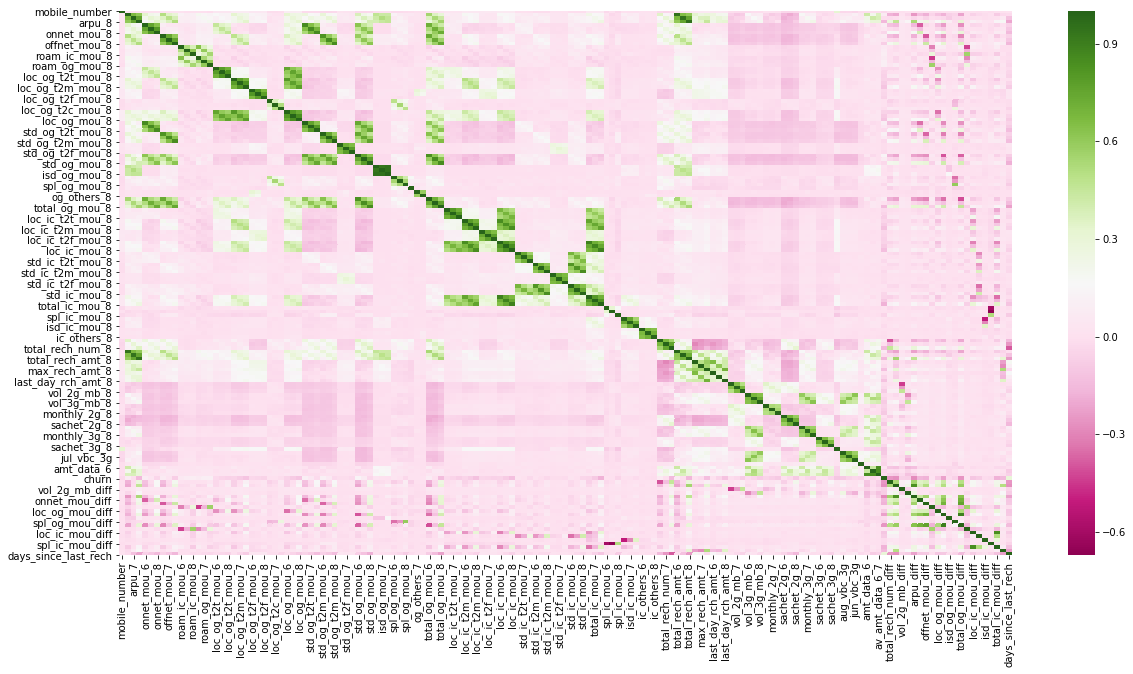

In [115]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corr, cmap="PiYG")

We will remove highly correlated features for two reasons - 

- PCA needs non-correlated features to perform well
- Decision Trees are immune to multicollinearity anyways.

In [116]:
churn_hv.shape

(30001, 151)

## Data Preparation for training

### Splitting Data into Training and Test Sets

In [119]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_hv.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_hv['churn']

y.head()

1    1
2    0
3    0
4    0
5    0
Name: churn, dtype: int64

In [120]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Standardising the features

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Model Building
Let's start by splitting our data into a training set and a test set.

### Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 50)
rfe = rfe.fit(X,y)

ranks = rfe.ranking_
print(ranks)

feature_indexes=[]
for i in range(len(ranks)):
    if ranks[i]==1:
        feature_indexes+=[i]

feature_indexes

In [123]:
# Variables selected by RFE 
col = churn_hv.columns[feature_indexes]
X_train_RFE = X_train[col]

NameError: name 'feature_indexes' is not defined

In [124]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

### Making Predictions

In [125]:
# scaling X_test
X_test = scaler.transform(X_test)

# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.003502
1,0.040068
2,0.166937
3,0.015664
4,0.003298


In [126]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
7104,0
8897,0
3477,0
11144,0
5297,0


In [127]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,7104,0,0.003502
1,8897,0,0.040068
2,3477,0,0.166937
3,11144,0,0.015664
4,5297,0,0.003298


In [128]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,7104,0,0.003502,0
1,8897,0,0.040068,0
2,3477,0,0.166937,0
3,11144,0,0.015664,0
4,5297,0,0.003298,0


### Model Evaluation

In [129]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[8018,   56],
       [ 417,   61]], dtype=int64)

In [131]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9446913002806361

Note how, Accuracy is quite high even with a lot of false negatives and false positives. Hence Accuracy is not the right metric, we have to check ROC. 

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

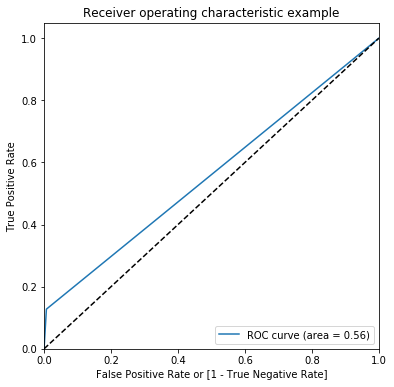

(array([0.        , 0.00693584, 1.        ]),
 array([0.        , 0.12761506, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [133]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [134]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.88'

#### We see an overall AUC score of 0.88. AUC is the right metric for imbalanced dataset. 

- Can PCA help reduce our effort?

## PCA and Logistic Regression

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [135]:
# Putting feature variable to X
X = churn_hv.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_hv['churn']

y.head()

1    1
2    0
3    0
4    0
5    0
Name: churn, dtype: int64

In [136]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [137]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_tr.shape

In [138]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_tr)

PCA(random_state=42)

#### Components from the PCA

In [139]:
pca.components_

array([[ 1.12194992e-01,  1.38396283e-01,  1.79721324e-01, ...,
         1.26984815e-02,  4.40414141e-02, -3.81795211e-02],
       [ 1.55692661e-01,  1.35270346e-01,  2.93857164e-02, ...,
        -6.43010592e-02, -2.34673386e-02, -5.91929187e-04],
       [-8.44248740e-03,  7.08710412e-02,  1.89939736e-01, ...,
         1.79206679e-01,  9.07961535e-02, -1.03491346e-01],
       ...,
       [ 0.00000000e+00,  1.04834000e-15, -9.18586638e-16, ...,
        -1.56881091e-02,  2.14238349e-15, -8.32667268e-17],
       [-0.00000000e+00, -4.06194717e-16,  1.98590842e-16, ...,
        -2.03215035e-01,  2.29677388e-15, -7.97972799e-17],
       [ 0.00000000e+00, -2.30966556e-16,  2.56831984e-16, ...,
         1.16190227e-01, -1.35308431e-15, -5.89805982e-17]])

Looking at the explained variance ratio for each component

In [140]:
pca.explained_variance_ratio_

array([9.36707371e-02, 8.20317392e-02, 5.51744848e-02, 4.72989957e-02,
       3.80357464e-02, 3.64151108e-02, 3.13562182e-02, 2.80574809e-02,
       2.57755190e-02, 2.41883936e-02, 2.14385727e-02, 1.98276848e-02,
       1.84489129e-02, 1.80097740e-02, 1.74775720e-02, 1.69021777e-02,
       1.62903533e-02, 1.59657482e-02, 1.45654363e-02, 1.38544315e-02,
       1.36903990e-02, 1.32954203e-02, 1.24228777e-02, 1.22641012e-02,
       1.19254796e-02, 1.17291284e-02, 1.14409113e-02, 1.12768173e-02,
       1.08378501e-02, 1.03323938e-02, 9.91946541e-03, 9.49486744e-03,
       9.39121408e-03, 8.95644895e-03, 8.15089401e-03, 7.80634456e-03,
       7.52451106e-03, 7.16778343e-03, 7.07838819e-03, 6.68837395e-03,
       6.54065460e-03, 6.42814241e-03, 6.14059802e-03, 5.91824123e-03,
       5.87150674e-03, 5.38871788e-03, 5.35950571e-03, 5.32853285e-03,
       5.24889822e-03, 4.82111663e-03, 4.69106522e-03, 4.35278014e-03,
       4.13490410e-03, 4.03841566e-03, 3.54738960e-03, 3.46023590e-03,
      

In [141]:
# extract pca model from pipeline
# pca_ex = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.37
1       17.57
2       23.09
3       27.82
4       31.62
5       35.26
6       38.40
7       41.20
8       43.78
9       46.20
10      48.34
11      50.33
12      52.17
13      53.97
14      55.72
15      57.41
16      59.04
17      60.64
18      62.09
19      63.48
20      64.85
21      66.18
22      67.42
23      68.65
24      69.84
25      71.01
26      72.16
27      73.28
28      74.37
29      75.40
30      76.39
31      77.34
32      78.28
33      79.18
34      79.99
35      80.77
36      81.52
37      82.24
38      82.95
39      83.62
40      84.27
41      84.91
42      85.53
43      86.12
44      86.71
45      87.25
46      87.78
47      88.32
48      88.84
49      89.32
50      89.79
51      90.23
52      90.64
53      91.04
54      91.40
55      91.74
56      92.09
57      92.42
58      92.74
59      93.04
60      93.34
61      93.63
62      93.92
63      94.20
64      94.47
65      94.74
66      95.00
67      95.24
68      95.47
69      95.70
70      95.91
71    

~ 50 components explain 90% variance

~ 65 components explain 95% variance

Making a scree plot for the explained variance

In [142]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative variance explained')

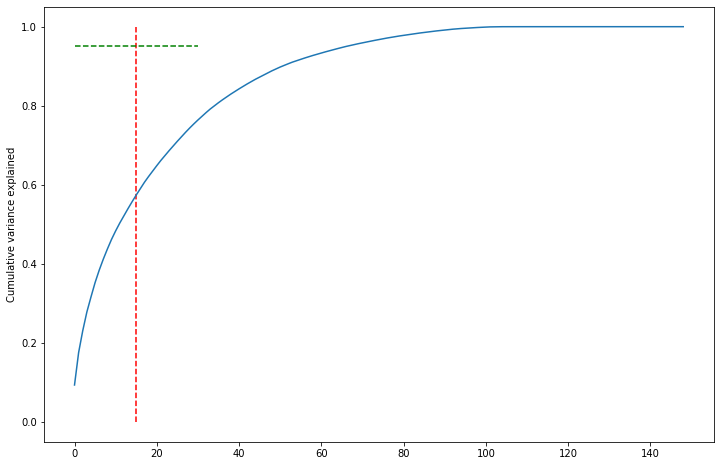

In [143]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 50 components

In [151]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=50)
df_train_pca = pca_final.fit_transform(X_tr)
df_train_pca.shape

(37668, 50)

In [150]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(50, 50)

Plotting the heatmap of the corr matrix

<Figure size 1512x1512 with 0 Axes>

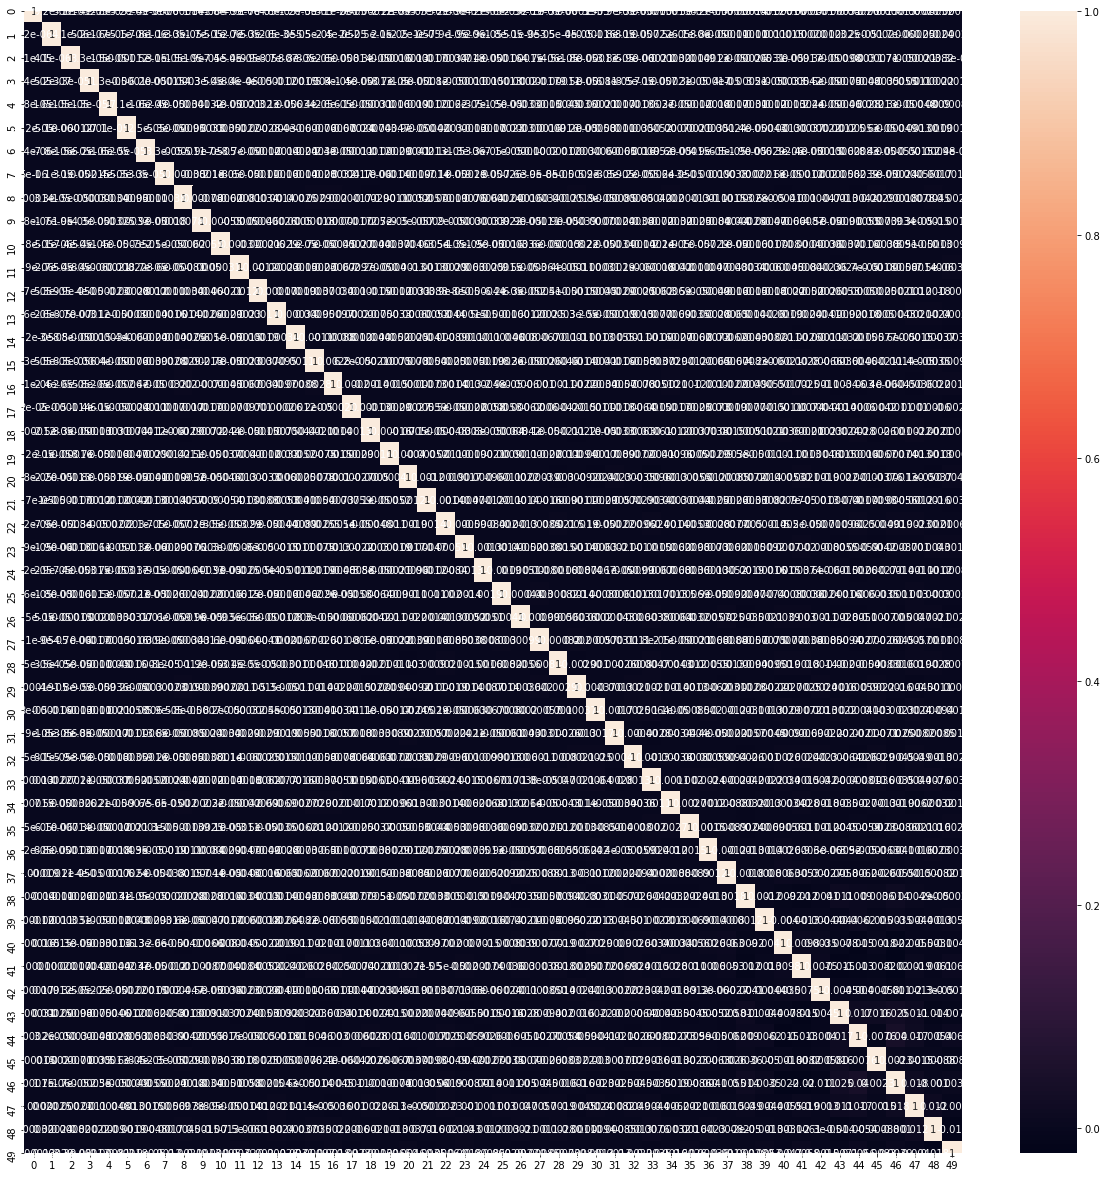

In [155]:
plt.figure(figsize=[21,21])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [156]:
X_test = scaler.transform(X_test)
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8552, 50)

### Applying logistic regression on the data on our Principal components

In [157]:
from sklearn.linear_model import LogisticRegression

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_tr)

Making predictions on the test set

In [158]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [161]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support

"AUC: {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'AUC: 0.87'

Conclusions from the above model:

- #### Model has 0.87 AUC and 65 features can explain 95% variance in the dataset.



## Decision Tree

In [164]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 149)
(37666,)


skipping standardization because decision tree doesn't require it. It is also not affected too much with multicollinearity

In [165]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(37666, 109)
[  0   1   2   3   4   6   8   9  10  13  14  15  17  18  20  21  23  24
  25  26  29  30  31  33  34  35  36  37  38  40  41  42  46  47  48  51
  53  57  58  59  61  62  63  65  66  67  68  69  70  73  75  76  77  78
  80  87  88  89  90  91  93  94  95  96  97  98  99 100 101 102 104 105
 106 107 108 109 110 111 113 114 115 116 117 118 119 120 121 122 123 124
 126 127 128 129 130 131 132 133 134 135 137 139 140 141 142 143 146 147
 148]


In [166]:
# feature vector for decision tree
lasso_features = list(churn_hv.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_7', 'isd_i

In [167]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [168]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8075
           1       0.26      0.67      0.37       477

    accuracy                           0.87      8552
   macro avg       0.62      0.78      0.65      8552
weighted avg       0.94      0.87      0.90      8552



In [169]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[7144  931]
 [ 157  320]]
Decision Tree - Accuracy : 0.872778297474275


In [170]:
print("AUC:    \t", round(roc_auc_score(y_test, y_pred1),2))

AUC:    	 0.78


### FIne tuning the hyper parameters

In [171]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

KeyboardInterrupt: 

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Max depth 14 seems to be the best fit

In [ ]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

In [ ]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_sample_leaf = 5 seems to be the optimal one ?

In [ ]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf=5 seems to be optimal

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3, 20, 3),
    'min_samples_leaf': range(5, 175, 50),
    'min_samples_split': range(5, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

In [ ]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

In [ ]:
y_preds = clf_gini.predict_proba(X_test)
y_preds

In [ ]:
round(metrics.roc_auc_score(y_test, y_preds[:,1]),2)

Conclusion from the above Decision Tree model - 
#### 0.82 accuracy on the test dataset


### Business Insights

- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.